In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../artifacts/raw/data.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [7]:
data.duplicated().sum()

0

In [10]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
data['Species'].value_counts(normalize=True)

Species
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64

In [12]:
data.drop(columns=['Id'], inplace=True)

In [13]:
data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


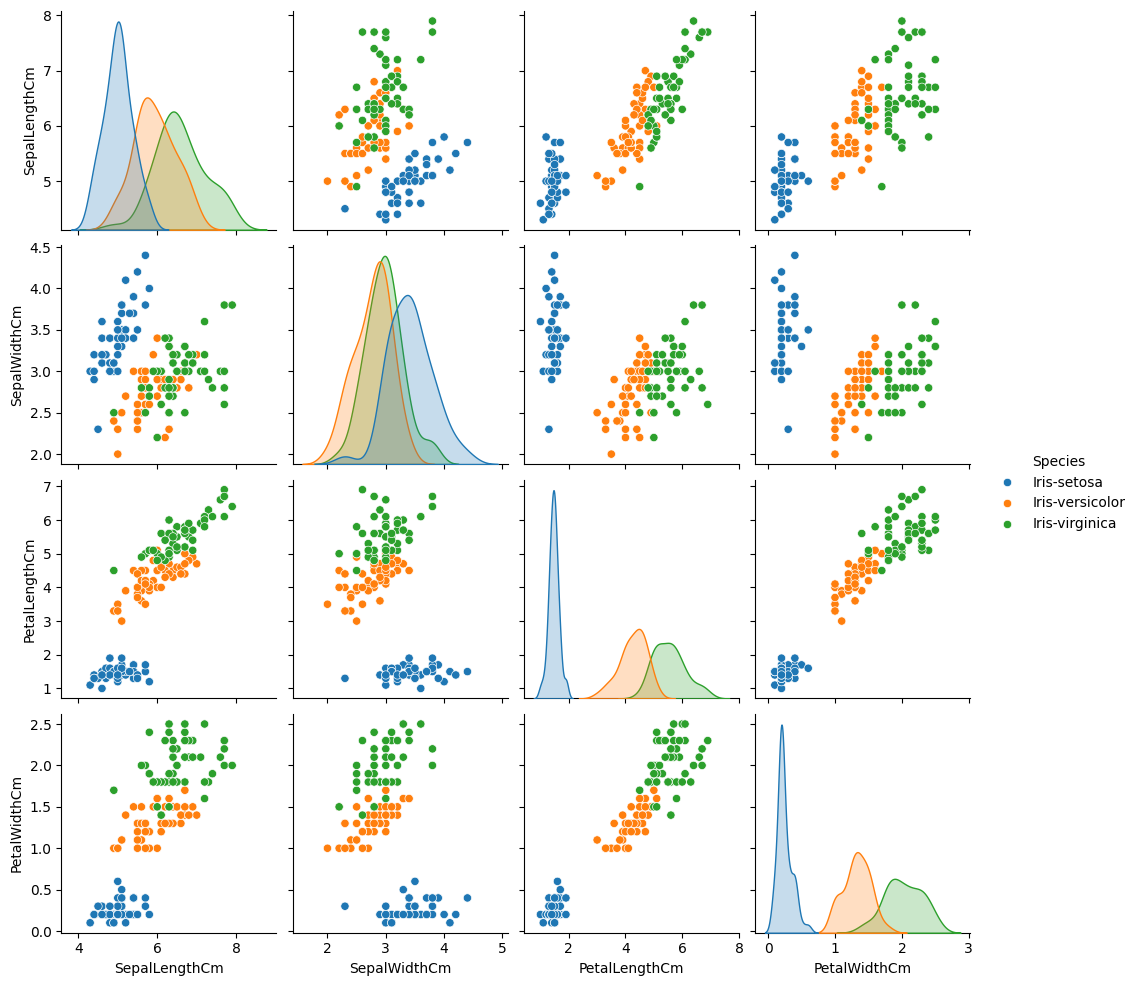

In [14]:
sns.pairplot(data, hue='Species')
plt.show()

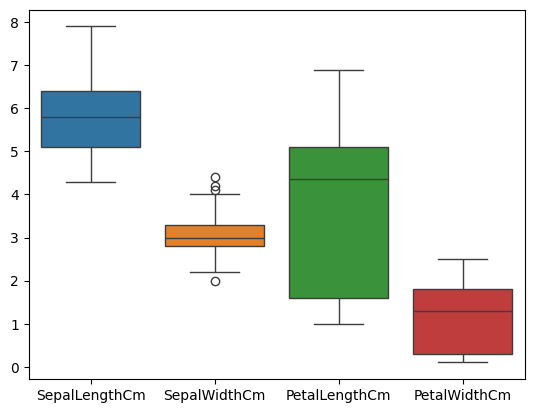

In [16]:
sns.boxplot(data=data, orient='v')
plt.show()

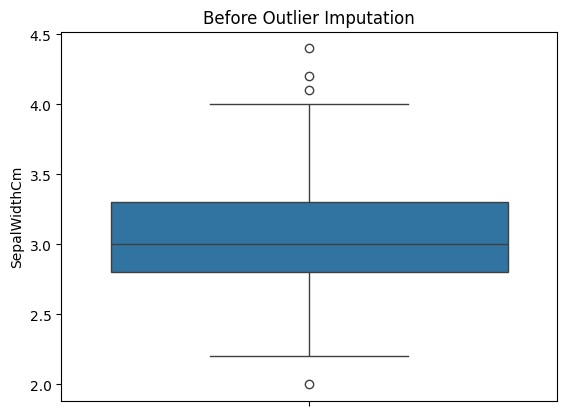

In [19]:
sns.boxplot(data['SepalWidthCm'])
plt.title('Before Outlier Imputation')
plt.show()

In [20]:
Q1 = data['SepalWidthCm'].quantile(0.25)
Q3 = data['SepalWidthCm'].quantile(0.75)

IQR = Q3-Q1

upper_value = Q3 + 1.5*IQR
lower_value = Q1 - 1.5*IQR

sepal_median = np.median(data['SepalWidthCm'])

In [21]:
lower_value

2.05

In [22]:
upper_value

4.05

In [23]:
for i in data['SepalWidthCm']:
    if i > upper_value or i < lower_value:
        data['SepalWidthCm'] = data['SepalWidthCm'].replace(i, sepal_median)

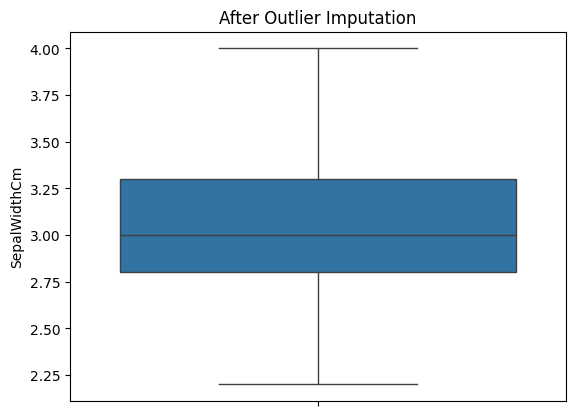

In [24]:
sns.boxplot(data['SepalWidthCm'])
plt.title('After Outlier Imputation')
plt.show()

#### Model Training 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [28]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data.Species

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [ ]:
# initialize model
tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=30,
                                    random_state=32)
                                    

In [32]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
y_pred = tree_model.predict(X_test)

In [34]:
accuracy= accuracy_score(y_test, y_pred)
accuracy

0.9666666666666667

In [35]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  0],
       [ 0,  9,  0],
       [ 0,  1,  8]])

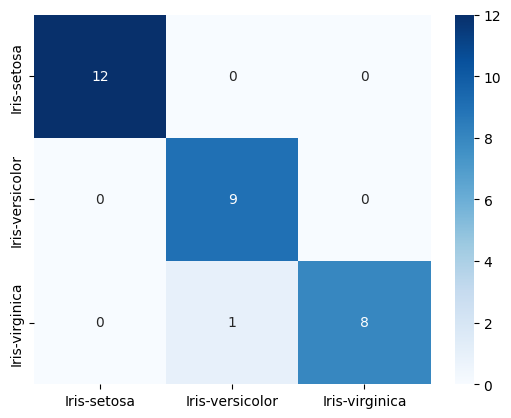

In [40]:
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=tree_model.classes_, yticklabels=tree_model.classes_)
plt.show()

[Text(0.5, 0.9166666666666666, 'PetalLengthCm <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [38, 41, 41]\nclass = Iris-versicolor'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]\nclass = Iris-setosa'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'PetalWidthCm <= 1.75\ngini = 0.5\nsamples = 82\nvalue = [0, 41, 41]\nclass = Iris-versicolor'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'PetalLengthCm <= 4.95\ngini = 0.165\nsamples = 44\nvalue = [0, 40, 4]\nclass = Iris-versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'PetalWidthCm <= 1.6\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]\nclass = Iris-versicolor'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = Iris-versicolor'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(0.4615384615384

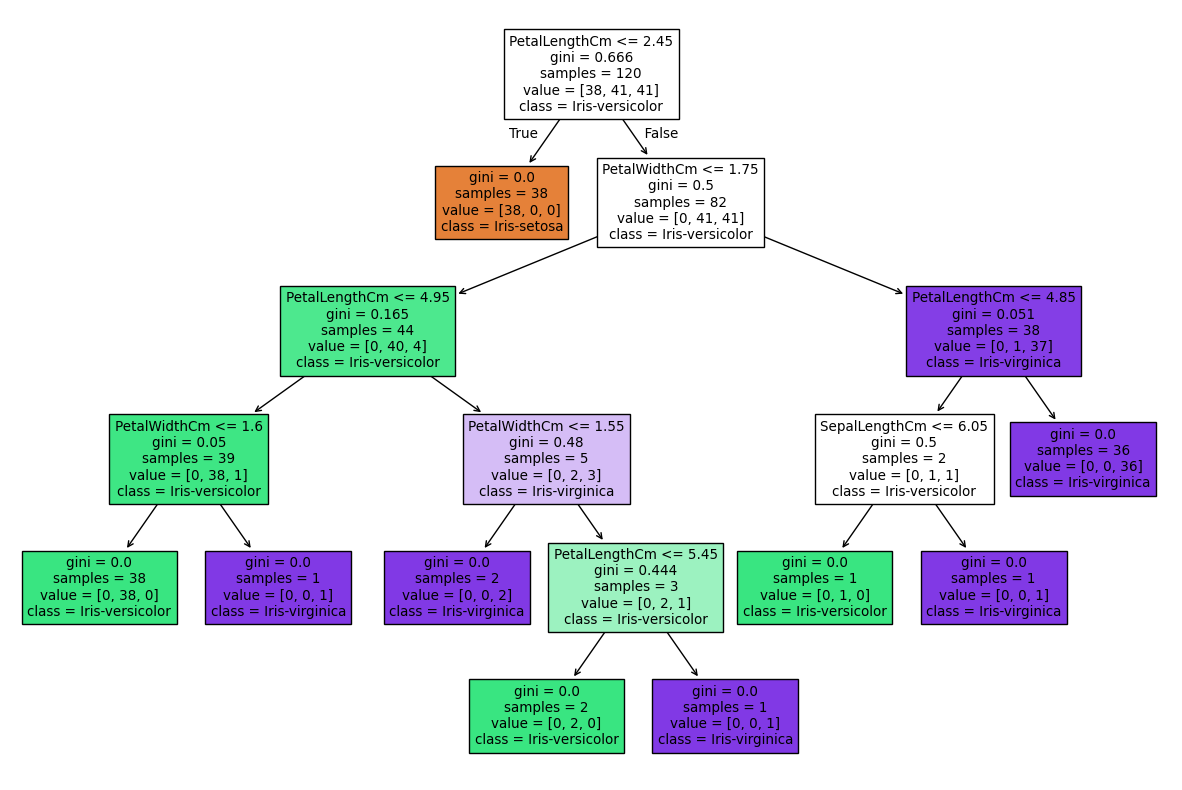

In [42]:
plt.figure(figsize=(15,10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=tree_model.classes_)

In [43]:
tree_model.feature_importances_

array([0.01250782, 0.        , 0.55227906, 0.43521312])

In [44]:
X.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')